This notebook compares using a linear regression model for each residual bin to using a multi-layer perceptron. It shows that the distribution produced by the stochastic model with the multi-layer perceptron is slightly closer to the true distribution than the stochastic model with linear regression, but the difference is so small it may not justify the increased complexity, and lack of interpretability of the MLP. 

In [1]:
from uwnet.stochastic_parameterization.stochastic_state_model import StochasticStateModel
from uwnet.stochastic_parameterization.examine_stochastic_state_model import (
    compare_true_to_simulated_q1_q2_distributions,
)
dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'
kwargs_ = {
    'base_model_location': base_model_location,
    'ds_location': ds_location,
    't_start': 0,
    't_stop': 100,
    'binning_quantiles': (0.0073, 0.0557, 0.3024, 0.5967, 0.8348, 0.9666, 1.),
    'verbose': False}
base_model = StochasticStateModel(
    ds_location,
    t_start=0,
    t_stop=50,
    base_model_location=base_model_location,
    ds_location=ds_location,
    verbose=False,
    binning_quantiles=(1,),
)
base_model.train()
%matplotlib inline

/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.68901e-10): result may not be accurate.
  overwrite_a=True).T
/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.4528e-10): result may not be accurate.
  overwrite_a=True).T




True QT Variance: 312.93977063545304
Stochastic QT Variance: 238.8388802425933
Base Model QT Variance: 142.96637113545293
True sli Variance: 276198.3206630993
Stochastic sli Variance: 209149.37013413277
Base Model sli Variance: 150035.43125132524


True QT Mean: -5.935742227652129
Stochastic QT Mean: -5.899964292601417
Base Model QT Mean: -6.183047405915145
True sli Mean: 216.43305633054717
Stochastic sli Mean: 187.48127584361208
Base Model sli Mean: 175.3286311286212


SLI R2 Stochastic Model:  0.4094618629071717
SLI R2 Single Model Model:  0.6789642940413005
QT R2 Stochastic Model:  0.2536577265903215
QT R2 Single Model Model:  0.6156455282642769


SLI MSE Stochastic Model:  163105.64175255428
SLI MSE Single Model Model:  88669.5228586853
QT MSE Stochastic Model:  233.5601798563674
QT MSE Single Model Model:  120.27980022768791


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.2105649967783505, pvalue=0.0)
KS Divergence test: QT true vs stochastic model: Ks_

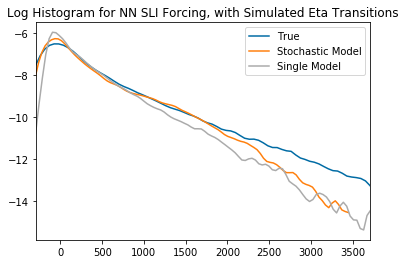

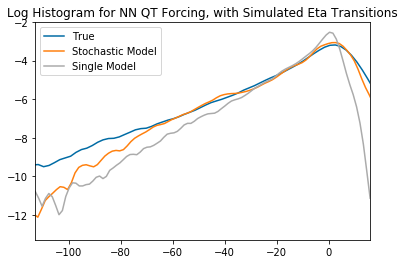

In [2]:
from sklearn.linear_model import LinearRegression
linear_regression = StochasticStateModel(
    residual_model_class=LinearRegression,
    **kwargs_
)
linear_regression.train()
compare_true_to_simulated_q1_q2_distributions(linear_regression, base_model, true_etas=False, only_tropics=True)

/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.11888e-09): result may not be accurate.
  overwrite_a=True).T
/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.31321e-09): result may not be accurate.
  overwrite_a=True).T
/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.30119e-10): result may not be accurate.
  overwrite_a=True).T
/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.26411e-10): result may not be accurate.
  overwrite_a=True).T
/anaconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.95939e-10): result may not be accurate.
  overwrite_a=True).T
/anaconda3/envs/uwnet/lib/pyth



True QT Variance: 312.93977063545304
Stochastic QT Variance: 236.66086661485488
Base Model QT Variance: 142.96637113545293
True sli Variance: 276198.3206630993
Stochastic sli Variance: 207686.62182923168
Base Model sli Variance: 150035.43125132524


True QT Mean: -5.935742227652129
Stochastic QT Mean: -5.786682266975439
Base Model QT Mean: -6.183047405915145
True sli Mean: 216.43305633054717
Stochastic sli Mean: 185.01945559890498
Base Model sli Mean: 175.3286311286212


SLI R2 Stochastic Model:  0.41605004259546763
SLI R2 Single Model Model:  0.6789642940413005
QT R2 Stochastic Model:  0.260959665198208
QT R2 Single Model Model:  0.6156455282642769


SLI MSE Stochastic Model:  161285.9975864202
SLI MSE Single Model Model:  88669.5228586853
QT MSE Stochastic Model:  231.2751128632212
QT MSE Single Model Model:  120.27980022768791


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.2105649967783505, pvalue=0.0)
KS Divergence test: QT true vs stochastic model: Ks_

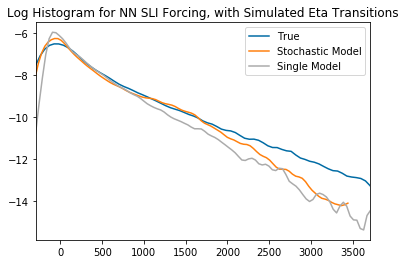

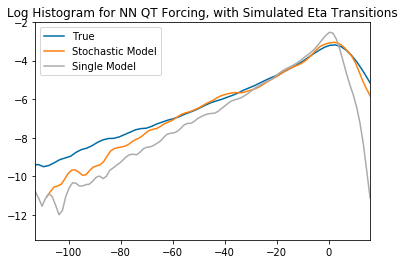

In [3]:
# Uses a default lambda of 1.0
from sklearn.linear_model import Ridge
ridge_regression = StochasticStateModel(
    residual_model_class=Ridge,
    **kwargs_
)
ridge_regression.train()
compare_true_to_simulated_q1_q2_distributions(linear_regression, base_model, true_etas=False, only_tropics=True)



True QT Variance: 312.93977063545304
Stochastic QT Variance: 246.09052660831668
Base Model QT Variance: 142.96637113545293
True sli Variance: 276198.3206630993
Stochastic sli Variance: 200295.03236483337
Base Model sli Variance: 150035.43125132524


True QT Mean: -5.935742227652129
Stochastic QT Mean: -6.2812946279118185
Base Model QT Mean: -6.183047405915145
True sli Mean: 216.43305633054717
Stochastic sli Mean: 177.48333824499457
Base Model sli Mean: 175.3286311286212


SLI R2 Stochastic Model:  0.41823849623037224
SLI R2 Single Model Model:  0.6789642940413005
QT R2 Stochastic Model:  0.24175601153073445
QT R2 Single Model Model:  0.6156455282642769


SLI MSE Stochastic Model:  160681.5503676105
SLI MSE Single Model Model:  88669.5228586853
QT MSE Stochastic Model:  237.28469983728309
QT MSE Single Model Model:  120.27980022768791


KS Divergence test: QT true vs single model: Ks_2sampResult(statistic=0.2105649967783505, pvalue=0.0)
KS Divergence test: QT true vs stochastic model:

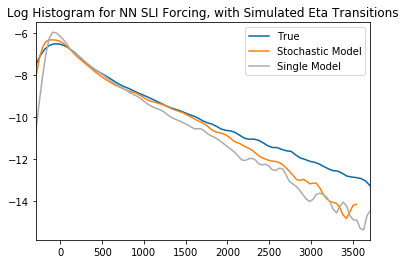

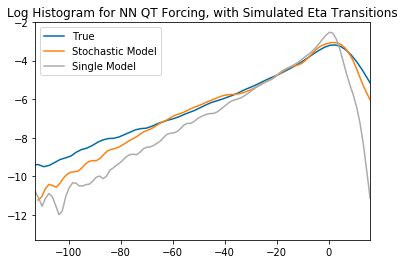

In [4]:
# Uses one 100 node hidden layer as default
from sklearn.neural_network import MLPRegressor
mlp = StochasticStateModel(
    residual_model_class=MLPRegressor,
    **kwargs_
)
mlp.train()
compare_true_to_simulated_q1_q2_distributions(mlp, base_model, true_etas=False, only_tropics=True)